In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis 
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import statistics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [2]:
df=pd.read_csv("C:/Users/Jivitesh Sharma/Documents/2019 Indian election candidates.csv")
df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATES                                    2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2018 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2018 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINALCASES                             1996 non-null   float64
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

,STATES,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTAL_VOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTALELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


Took a look at the data beofre moving ahead used df.info to see all the columns and df.head to see how the data looked like

# Fetching Total Votes by each party

In [3]:
df=pd.read_csv("C:/Users/Jivitesh Sharma/Documents/2019 Indian election candidates.csv")
UniquePartyArray=[i for i in set(df.PARTY)] #Array Of Unique parties
PartiesTotalVotes={}
AllIndexes={}
PartyOrderedNames=[]

for i in range (len(df.PARTY)):
        PartyOrderedNames.append(df.PARTY[i])
np.asarray(PartyOrderedNames)

for i in UniquePartyArray:
    PartiesTotalVotes[i]=0 #Initialising keys in dictionary
    
for i in PartiesTotalVotes.keys():
    AllIndexes[i]=np.where(df.PARTY==i)[0] # getting all the index values for the occurence of a prticular party and storing it

# defining a function which takes a party name and iterates through all the indexes of it occuring and adding the votes
# at that partocular index to partiesTotalVotes
def SumTotal(target):
    for x in AllIndexes[target]:
        PartiesTotalVotes[target]=PartiesTotalVotes[target]+df.TOTAL_VOTES[x]
    return PartiesTotalVotes

#using SumTotal to fill up the Unique party array with all the votes
for i in UniquePartyArray:
    for j in df.PARTY:
        if i==j:
            SumTotal(j) 
#dividing the total votes by the counts due to votes for a party being added as many times as tehy appear in AllIndexes          
for i in PartiesTotalVotes.keys():
    PartiesTotalVotes[i]=PartiesTotalVotes[i]/PartyOrderedNames.count(i)




In [4]:
CopyOfDict=PartiesTotalVotes.copy()

First thing that came to mid after looking at the data was i relaised that I could easily make a top ten votes gathered by each party but first i had to filter out the top ten parties I first ordered all the party names and then compared the occurence of each party in with the ordered name and added their votes in my dictionary consisting of the unique part names as keys 
I then divided it by the count of the ocuurences of the particluar party as i saw everytime i iterated thorugh the data it would count votes for a particular party again and again.

# Filtering top ten parties in 2019

['BJP' 'INC' 'AITC' 'BSP' 'SP' 'YSRCP' 'CPI(M)' 'DMK' 'SHS' 'TDP']


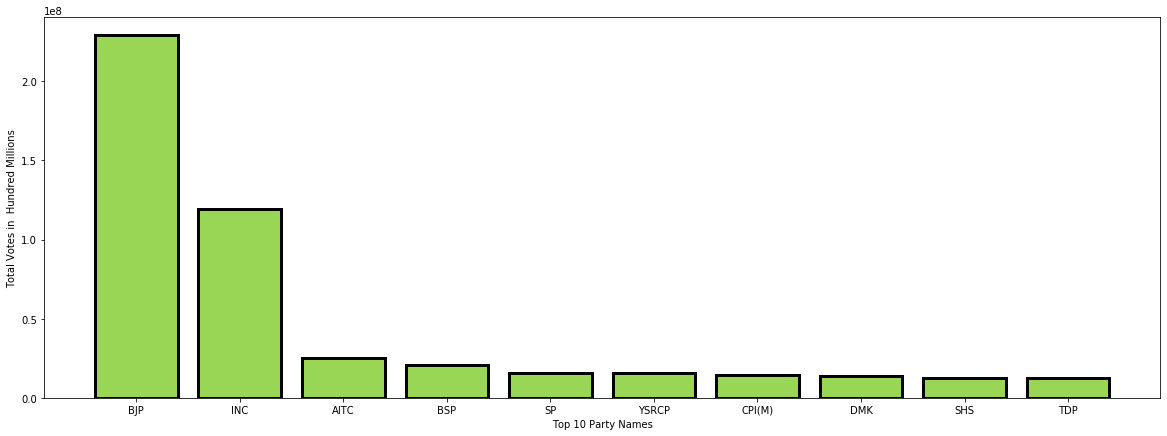

In [5]:
#fetching the names and votes of each party
Top_ten2019=pd.DataFrame({"PartyName":[i for i in CopyOfDict.keys()],"PartyVotes":[i for i in CopyOfDict.values()]}) 

#Sorting values by number of votes
Top_ten2019.sort_values(by=["PartyVotes"],ascending=False,inplace=True)

#Exctracting the top 10
OriginalTopTen2019=Top_ten2019.head(10)
Labels2019=[] 

#Exctracting labels for the top 10 parties
ArrayLabels2019=(np.asarray(OriginalTopTen2019.PartyName))
X_axis2019=np.arange(len(OriginalTopTen2019.PartyName))
print(ArrayLabels2019)

#Plotting the top 10 parties with the highest votes
plt.figure(figsize=(20,7))
plt.bar(X_axis2019,OriginalTopTen2019.PartyVotes,color='#9ad656',edgecolor='#000000',linewidth=3)
plt.xlabel("Top 10 Party Names")
plt.ylabel("Total Votes in  Hundred Millions")
plt.xticks(X_axis2019,ArrayLabels2019)
plt.show()

# Unravelling important features for the use of further analysis

## but first taking a look at some important visualisations to understand aspects in the data we can explore

Before moving ahead i thought of looking at the correlation between the columns of the data by using a heatmap and pairplots to get insisght into what features i might use for my models

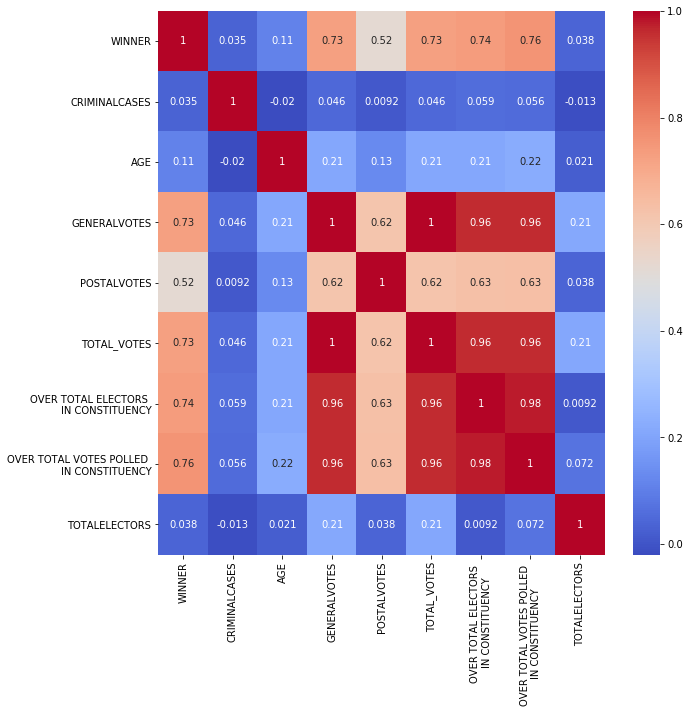

In [6]:
import seaborn as sb

data2019=pd.read_csv("C:/Users/Jivitesh Sharma/Documents/2019 Indian election candidates.csv")
plt.subplots(figsize=(10,10))
sb.heatmap(data2019.corr(),annot=True,cmap="coolwarm")


Created a pair plot of the data which divides the plots by winners and losers as that is what we are looking to classify, I used the hue parameter to do the aforementioned

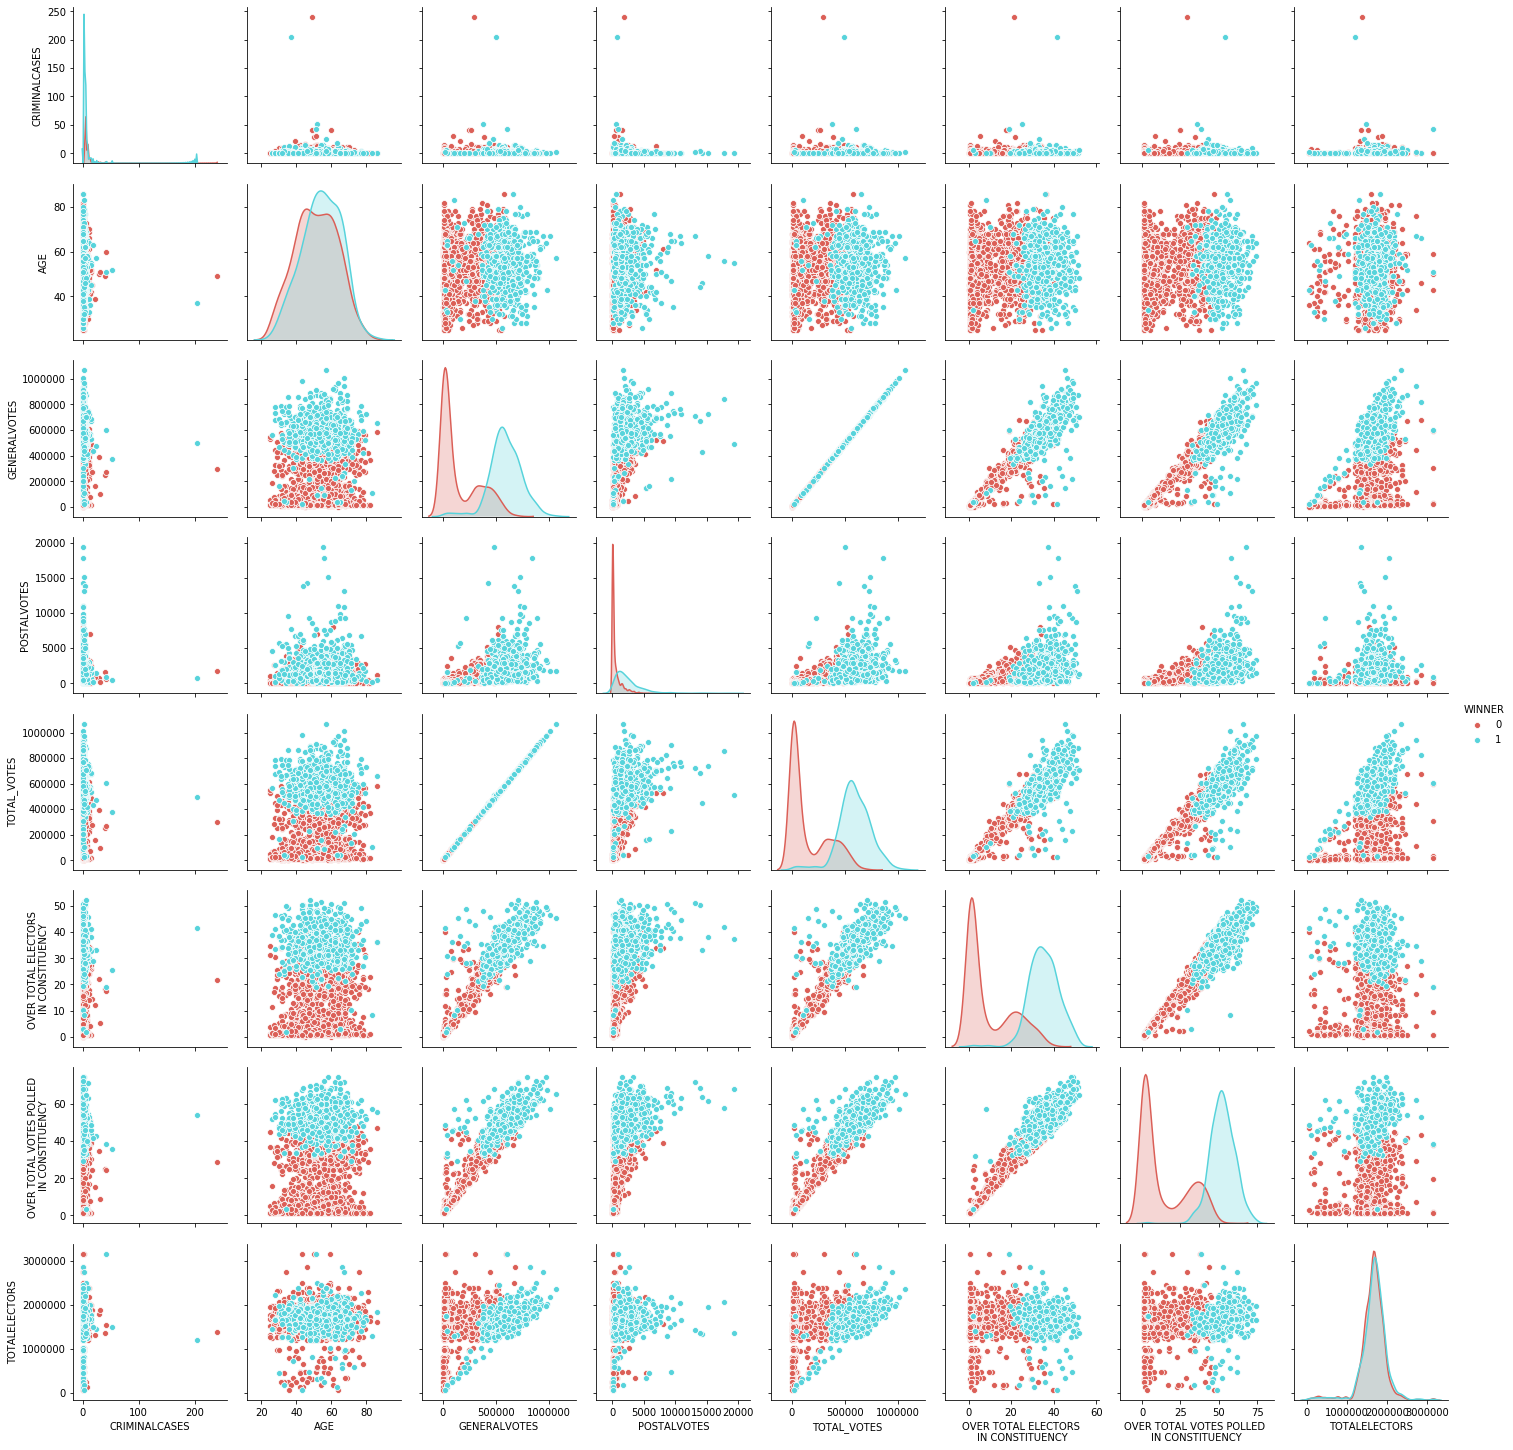

In [7]:
sb.pairplot(data2019, hue="WINNER",palette="hls")

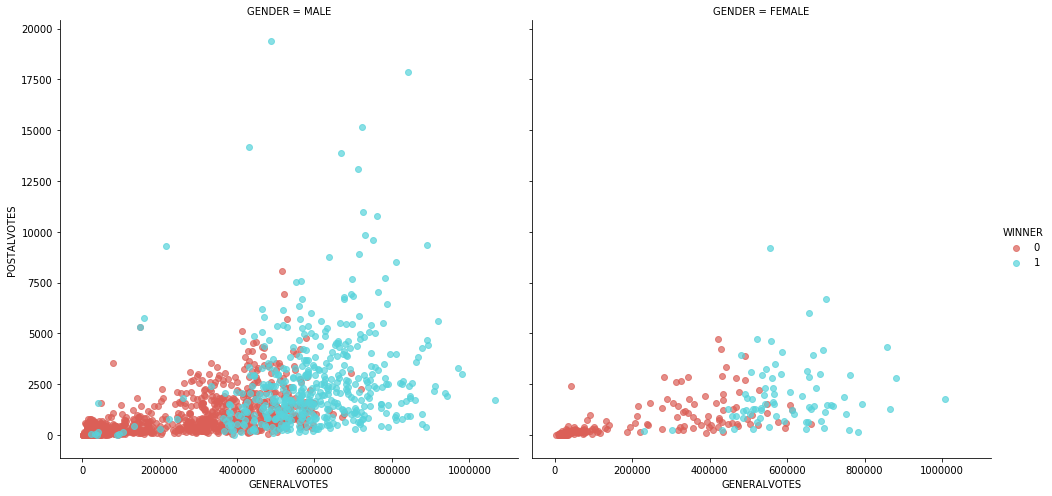

In [8]:
#Distribution of Winner with respect to gender
gender_winner=sb.FacetGrid(data2019,col="GENDER",hue="WINNER",height=7,palette="hls")
gender_winner.map(plt.scatter, "GENERALVOTES", "POSTALVOTES", alpha=.7)
gender_winner.add_legend() 

#exporing relation between male and femae winner and how many general votes and postal votes they ammased as they are related to
#exploring who the winner is
# also exporing how stongly generalvotes and postal votes are related compared between male and female winners



In [9]:
data2019.head()
data2019['STATES'].dtypes

dtype('O')

Before going ahed with creating any model I first decided to extrcta the important features

# Principal Component Analysis

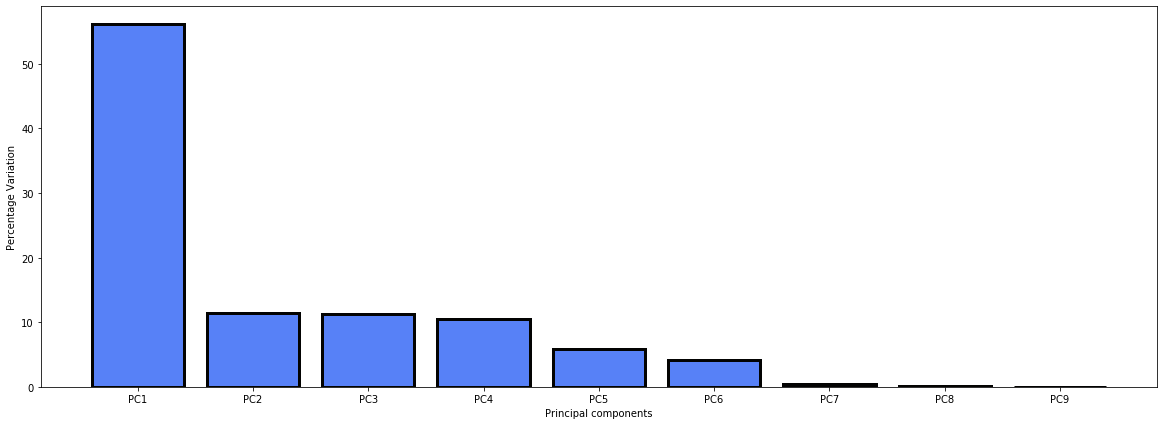

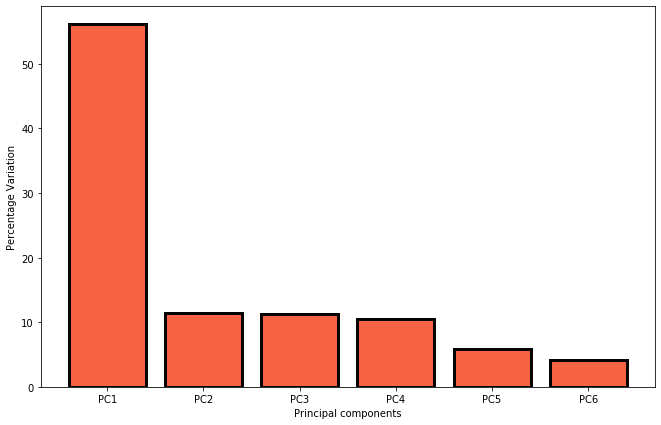

,WINNER,CRIMINALCASES,AGE,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUEMCY,TOTALELECTORS
PC1,0.360168,0.023768,0.105178,0.434598,0.318232,0.434907,0.432021,0.434765,0.060808
PC2,0.099813,0.510036,-0.182933,-0.076003,0.069320,-0.075275,0.101108,0.048032,-0.817104
PC3,-0.011079,0.710557,-0.457136,0.060958,-0.072501,0.060268,-0.041999,-0.018349,0.520871
PC4,-0.120794,0.480418,0.858602,-0.014353,-0.094293,-0.014888,-0.031210,-0.016216,0.082789
PC5,-0.181881,0.056616,0.024722,-0.140845,0.936962,-0.134433,-0.146717,-0.135257,0.086455
PC6,0.899706,0.018272,0.091902,-0.216410,0.039862,-0.215322,-0.225938,-0.156466,0.106926


In [10]:
#Using PCA for feature selection and dimensionality reduction
#dropping all non integer columns for before doing PCA
DroppedData2019=data2019.drop(['STATES','NAME','CONSTITUENCY','PARTY','SYMBOL','GENDER','CATEGORY','EDUCATION','ASSETS','LIABILITIES'],axis=1)
DroppedData2019.CRIMINALCASES.fillna(DroppedData2019.CRIMINALCASES.mean(),inplace=True)
DroppedData2019.AGE.fillna(DroppedData2019.AGE.mean(),inplace=True)
#scaling data using standard scaler, I used this as since some of my data wa snormally distributed i though this would be
# better to use
DroppedData2019=StandardScaler().fit_transform(DroppedData2019)
#Now that we have scaled the data i would like to know the percentage of variation along each PC so i can choose the correct 
#no of components for my PCA Analysis 
ScaledData= pd.DataFrame(DroppedData2019,columns=['WINNER','CRIMINALCASES','AGE','GENERALVOTES','POSTALVOTES','TOTALVOTES','OVER_TOTAL_ELECTORS_IN_CONSTITUENCY','OVER_TOTAL_VOTES_POLLED_IN_CONSTITUEMCY','TOTALELECTORS'])
pca=PCA()

PcaData=pca.fit_transform(DroppedData2019)
PercentageVariation=np.round(pca.explained_variance_ratio_ *100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(PercentageVariation)+1)]

#making a plot comparing components and their variance 
plt.figure(figsize=(20,7))
plt.bar(x=range(1,len(PercentageVariation)+1),height=PercentageVariation,tick_label=labels,color='#5781f7',edgecolor='#030302',linewidth=3)
plt.xlabel('Principal components')
plt.ylabel('Percentage Variation')
plt.show()

#this shows that we can ignore PC7 PC8 and PC9 and get >98% variation
#lets check that by providing arguemnts to our PCA function
Pca2=PCA(n_components=0.98)
Pca2Data=Pca2.fit_transform(DroppedData2019)
PercentageVariation2=np.round(Pca2.explained_variance_ratio_ *100,decimals=1)
len(PercentageVariation2) # the lenght is 6 which corresponds to the first 6 pricipal components
labels=['PC'+str(i) for i in range(1,len(PercentageVariation2)+1)] 


#graph with unimportant components dropped
plt.figure(figsize=(11,7))
plt.bar(x=range(1,len(PercentageVariation2)+1),height=PercentageVariation2,tick_label=labels,color='#f56342',edgecolor='#030302',linewidth=3)
plt.xlabel('Principal components')
plt.ylabel('Percentage Variation')
plt.show()

#now exploring how each column influences our principal components
#having componnets with greater than 0.5 show that it has a significant influence on our pricipal component
#Meaning that particular principal componenest represent those columns much more than others
Scores=pd.DataFrame(Pca2.components_ , columns=ScaledData.columns,index=['PC1','PC2','PC3','PC4','PC5','PC6'])
Scores

#Fig1=go.scatter3d(x=Scores.transpose.PC1,y=Scores.transpose.PC2,z=Scores.transpose.PC3,size=Scores.transpose.PC4,color=Scores.transpose.PC5,symbol=Scores.transpose.PC6)
#Fig1.show()




Although I conducted PCA on my data to get the most components with the maximum variance, I couldnt related the pricipal componenets with my orignial data as each PC was a linear combination of all teh columns or feature sof my data. That is why I Cnducted feature selection with a Random forest classfier below and also used that as my classification model

# Random Forest Classifier


D:\anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



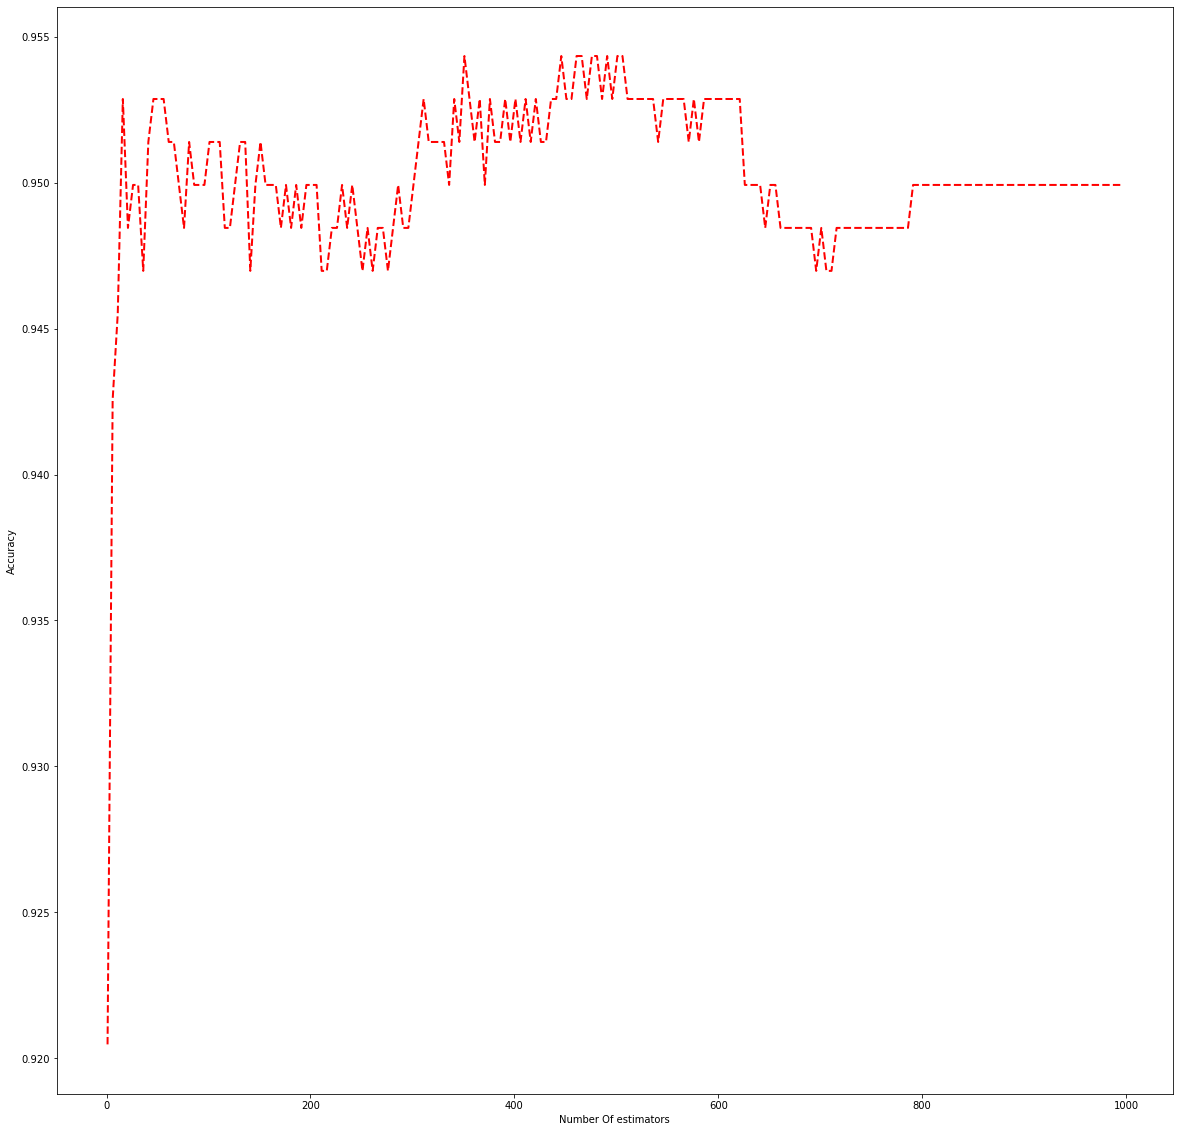

In [11]:
## Using Random Forest For Feature Selection and dimensionality reduction

#removing non integer columns
data2019cleaned=data2019[list(filter(lambda i:data2019[i].dtypes!='O',data2019.columns))]

#Using mean value to fill any Na values in the data
data2019cleaned.CRIMINALCASES.fillna(data2019cleaned.CRIMINALCASES.mean(),inplace=True)
data2019cleaned.AGE.fillna(data2019cleaned.AGE.mean(),inplace=True)
#standardising the data
Data2019cleaned=StandardScaler().fit_transform(data2019cleaned)
#seperating target and feature varaibles
Target=data2019cleaned['WINNER']
Features=data2019cleaned.drop('WINNER',axis=1)
ListOfScores=[]
NumberOfestimators=[]
ScoresDict={} 


X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.3, random_state=0)
#clf = RandomForestClassifier(n_estimators=30, random_state=0, n_jobs=-1)
#clf.fit(X_train, y_train)

#for feature in zip(data2019cleaned.columns, clf.feature_importances_):
#    print(feature)
#clf.score(X_test,y_test) 

#I wanted to find the best number of estimators for my model I could use Grid search to do this but i wouldnt know
# what the best value I could pass to get he best estimator and would have to run a range of estimators [0:1001] in 
# the grid search cv thus i decided to run the loop outtisde as it would take too much time for Grid CV search
#as it had other hyperparameter to fine tne also

for i in range(1,1001,5):
    clf = RandomForestClassifier(n_estimators=i, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    ScoresDict[i]=clf.score(X_test,y_test)
    #NumberOfestimators.append(i)
    #ListOfScores.append(clf.score(X_test,y_test))
    
#I made a plot of all teh estimators and their accuracy
plt.figure(figsize=(20,20))
plt.plot(list(ScoresDict.keys()),list(ScoresDict.values()),'r--', linewidth=2, markersize=5)
plt.xlabel('Number Of estimators')
plt.ylabel('Accuracy')
plt.show()






In [12]:
#Next i found the maximum value for the estimator
MaximumScore=max(list(ScoresDict.values()))
MaximumScore
BestEstimator=list(ScoresDict.keys())[list(ScoresDict.values()).index(MaximumScore)]
BestEstimator 


351

Before I knew how well my model was performing i had to first look at the null acuuracy if it was near my models score than my model would be no better than a random pick at the data.

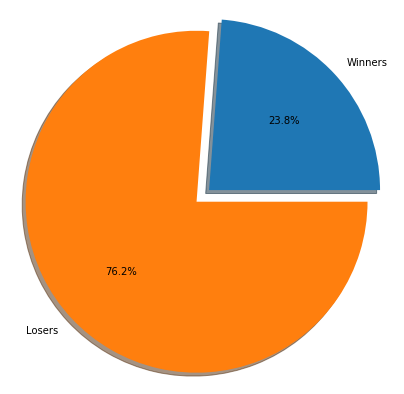

In [13]:
#checking the null accuracy before moving ahead and winner/loser Distribution
num_Winner=data2019cleaned.WINNER.mean()
num_Losers=1-num_Winner
num_Losers 


labels = 'Winners','Losers'
sizes = [num_Winner*100,num_Losers*100]
explode = (0.1, 0) 


fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, )
ax1.axis('equal') 

plt.show() 



In [14]:
#used the random Forest to make prediction on the train set best n_estimators set to 351 as previously found
X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.3, random_state=0)
clf = RandomForestClassifier(n_estimators=351, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train) 


# Next i though of looking athe feature scores to discard the features in the future
#got the score for all my fetaures
for feature in zip(Features.columns, clf.feature_importances_):
    print(feature)
clf.score(X_test,y_test)
mean_Score=statistics.mean(clf.feature_importances_)
mean_Score # found the mean importance of all the feature i will be using this below to filter out the features 

#ListOfImportantFeatures=[list(filter(lambda i: i in list(Features)>mean_Score,dict(zip(Features.columns, clf.feature_importances_))))]
#ListOfImportantFeatures 

# created a dictionary to which I added all the scores
FeatureDict=dict(zip(Features.columns, clf.feature_importances_))

#filtered the features which had lower importanct than the mean importance than all the features combined
for i in list(FeatureDict.keys()):
    if FeatureDict[i]<mean_Score:
        del FeatureDict[i]

FeatureDict



('CRIMINALCASES', 0.01605827716902137)
('AGE', 0.02660049965873996)
('GENERALVOTES', 0.16142853770071658)
('POSTALVOTES', 0.0707703168408516)
('TOTAL_VOTES', 0.15383205936575928)
('OVER TOTAL ELECTORS \nIN CONSTITUENCY', 0.2032948231700239)
('OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 0.33463848972456595)
('TOTALELECTORS', 0.03337699637032142)


{'GENERALVOTES': 0.16142853770071658,
 'TOTAL_VOTES': 0.15383205936575928,
 'OVER TOTAL ELECTORS \nIN CONSTITUENCY': 0.2032948231700239,
 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY': 0.33463848972456595}

After training my RF model on all the features i achieved a score of 95.43% which is good and also much higher than the null accuracy

In [15]:
#Score obtained prior to removal of columns
print(MaximumScore*100)
'''
prediction=clf.predict(X_test)
y=list(y_test)
correctcount=0

for idx,val in enumerate((prediction)):
    if val == y[idx]:
        correctcount+=1
correctcount
ratio=(correctcount/len(y))*100
ratio
''' 





95.43446244477173


'\nprediction=clf.predict(X_test)\ny=list(y_test)\ncorrectcount=0\n\nfor idx,val in enumerate((prediction)):\n    if val == y[idx]:\n        correctcount+=1\ncorrectcount\nratio=(correctcount/len(y))*100\nratio\n'

Below I tarin my model with the least important features removed to see how much does my accuracy vary by

In [16]:
#I am first going to train my model on my dataset with the most important features and check the score
# next we will move on to kfold cv, fine hyperparameter tuning and the displaying various evaluation metrics for our model
Important_features_Data= data2019cleaned.drop(['CRIMINALCASES','AGE','POSTALVOTES','TOTALELECTORS'],axis=1)
Target_var=Important_features_Data['WINNER']
Feature_var=Important_features_Data.drop('WINNER',axis=1)
X_trains, X_tests, y_trains, y_tests = train_test_split(Feature_var,Target_var, test_size=0.3, random_state=0)
classifier=RandomForestClassifier(n_estimators=BestEstimator, random_state=0, n_jobs=-1)
classifier.fit(X_trains,y_trains)
New_score=classifier.score(X_tests,y_tests)
MaximumScore-New_score

#Getting a difference of 0.0014 only it was best to move forward with only the most important features as this would severly 
#reduce computing overhead without harming the performance of teh model as seen


0.0014727540500737435

Next I thought of tuning my model even more using gridsearchCV and K fold cross validation

In [17]:
#First I got all the best hyperparameters using GridSerachCV then I used those hyperparameters in my model 
#below was the parameter grid i used for my grid search cv
''' 
param_grid = {
    'n_estimators': [100, 200,351,700,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_jobs':[1,-1]
    
    
}
grid_search = GridSearchCV(estimator =RfClassfier , param_grid =param_grid , 
                          cv = 10, n_jobs = -1, verbose = 2)

grid_search.fit(X_Test,y_Test)

grid_search.best_params_
''' 


X_Train, X_Test, y_Train, y_Test = train_test_split(Feature_var,Target_var, test_size=0.3, random_state=0)

# performing 10 fold CV
k_fold= model_selection.KFold(n_splits=10)
# trained my classifer 
RfClassfier=RandomForestClassifier(max_features='auto',n_estimators=BestEstimator,random_state=0,n_jobs=1)

#Added performance metrics to a dcitionary
ScoringDict={}
ScoringList=['accuracy','neg_log_loss','roc_auc']
model_selection.cross_val_score(RfClassfier,X_Train,y_Train,cv=k_fold,scoring='roc_auc').mean()
model_selection.cross_val_score(RfClassfier,X_Train,y_Train,cv=k_fold,scoring='accuracy').mean()
model_selection.cross_val_score(RfClassfier,X_Train,y_Train,cv=k_fold,scoring='neg_log_loss').mean()


for i in ScoringList:
    ScoringDict[i]=0
    result=model_selection.cross_val_score(RfClassfier,X_Test,y_Test,cv=k_fold,scoring=i)
    if i =='accuracy':
        ScoringDict[i]+=result.mean()
    elif i=='neg_log_loss':
        ScoringDict[i]+=abs(result.mean())
    else:
        ScoringDict[i]+=result.mean() 
        
#got the mean scores for each metric
    
Classifiers_score_df=pd.DataFrame.from_dict(ScoringDict,orient='index',columns=['Random Forest'])
Classifiers_score_df

#using 10 folds cv on all 3 performance metrics for our RandomForestClassfier we get:
#accuracy:- the number of correct predictions made as a ratio of all predictions made(94.99%)
#neg_log_loss:-The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. 
#Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.(0.18 The lower the better)
#roc_auc:-An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.(0.98)


,Random Forest
accuracy,0.949912
neg_log_loss,0.183176
roc_auc,0.980996


In [18]:
list(ScoringDict.values())

[0.9499122036874452, 0.18317649999786365, 0.9809955783742478]

ALthough we had recieved good scores with out RFC i decide to test other to see if we could do better

# SVM Classfier 

In [19]:
#Data2019cleaned=StandardScaler().fit_transform(data2019cleaned)
SVMClassfier= SVC(kernel='linear',C=0.001,gamma=0.01,probability=True)
steps = [('scaler', StandardScaler()), ('SVM', SVMClassfier)]
pipeline = Pipeline(steps)


param_grid = {
    'C': [0.001, 0.1, 100, 10e5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
     'gamma':[10,1,0.1,0.01],
    'decision_function_shape':['ovo', 'ovr']}

   
'''     
}
grid_search = GridSearchCV(estimator =SVMClassfier , param_grid =param_grid , 
                          cv = , n_jobs = -1, verbose = 2)

grid_search.fit(X_Train,y_Train)

grid_search.best_params_
''' 
SVMClassfier.fit(X_Train,y_Train)
YPrediction=SVMClassfier.predict(X_Test)
print(accuracy_score(y_Test,YPrediction))




0.9072164948453608


Similar to my random forest classifier I standardise my data and ran my classifier getting a score of 90.72%

Similarly i conducted 3 fold CV becuase 10 was taking too long and added the mean score for all the metrics to my dataframe

In [20]:
k_fold= model_selection.KFold(n_splits=3)
ScoringDictSVM={}
ScoringList=['accuracy','neg_log_loss','roc_auc']
model_selection.cross_val_score(SVMClassfier,X_Train,y_Train,cv=k_fold,scoring='roc_auc').mean()
model_selection.cross_val_score(SVMClassfier,X_Train,y_Train,cv=k_fold,scoring='accuracy').mean()
model_selection.cross_val_score(SVMClassfier,X_Train,y_Train,cv=k_fold,scoring='neg_log_loss').mean()

for i in ScoringList:
    ScoringDictSVM[i]=0
    result=model_selection.cross_val_score(SVMClassfier,X_Test,y_Test,cv=k_fold,scoring=i)
    if i =='accuracy':
        ScoringDictSVM[i]+=result.mean()
    elif i=='neg_log_loss':
        ScoringDictSVM[i]+=abs(result.mean())
    else:
        ScoringDictSVM[i]+=result.mean()
    
ScoringDictSVM

{'accuracy': 0.9042532454875053,
 'neg_log_loss': 0.1895006069332429,
 'roc_auc': 0.9667558851565504}

In [21]:
Classifiers_score_df['SVM']=ScoringDictSVM.values()

In the data frame below we can see the difference of teh avrious metrics of the SVM agains the RFC

In [22]:
Classifiers_score_df

,Random Forest,SVM
accuracy,0.949912,0.904253
neg_log_loss,0.183176,0.189501
roc_auc,0.980996,0.966756


I also created another Logistic Regression model to compare with the SVM and RFC i created

# Logistic Regression

In [23]:
log_reg = LogisticRegression()
param_grid = {
    'penalty': ['l1','l2', 'elasticnet', 'none'],
    'C':[0.0001,0.001,0.1,10,100,1e4],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'max_iter':[100,1000,10000]
}
     

       
grid_search = GridSearchCV(estimator =log_reg , param_grid =param_grid , 
                          cv =3 , n_jobs = -1, verbose = 2)

grid_search.fit(X_Train,y_Train)

grid_search.best_params_



Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 251 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 1057 out of 1080 | elapsed:   51.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.0min finished


{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}

Found the best parameter for my Logistic regression model  using grid cv search, I couldnt run Grid cv serach for my SVM model beacuse it was taking too long to run, luckily this wa snot the case with my Logistic Regresison model. Below I used my Tuned Logisctic Regresiion model on the training dataset and make predictions on the test data set while also getting the final scores for each metric i was looking at.

In [24]:
Tuned_log_reg = LogisticRegression(C= 0.1, max_iter= 10000, penalty= 'l1', solver= 'liblinear')

#fitting my Logistic regresison Model
Tuned_log_reg.fit(X_Train,y_Train)  

#Testing my logistic Regresison model
Log_reg_Predictions=Tuned_log_reg.predict(X_Test) 

#conducting 5 fold CV on my model
k_fold= model_selection.KFold(n_splits=5)
ScoringDictLog_reg={}
ScoringList=['accuracy','neg_log_loss','roc_auc']

for i in ScoringList:
    ScoringDictLog_reg[i]=0
    result=model_selection.cross_val_score(Tuned_log_reg,X_Test,y_Test,cv=k_fold,scoring=i)
    if i =='accuracy':
        ScoringDictLog_reg[i]+=result.mean()
    elif i=='neg_log_loss':
        ScoringDictLog_reg[i]+=abs(result.mean())
    else:
        ScoringDictLog_reg[i]+=result.mean()
    
ScoringDictLog_reg





D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'accuracy': 0.9425490196078432,
 'neg_log_loss': 0.17574043412310458,
 'roc_auc': 0.9869453118835934}

Adding the mean scores of the performance Metric to my Dataframe

In [25]:
Classifiers_score_df['LogReg']=ScoringDictLog_reg.values()

In [26]:
Classifiers_score_df

,Random Forest,SVM,LogReg
accuracy,0.949912,0.904253,0.942549
neg_log_loss,0.183176,0.189501,0.175740
roc_auc,0.980996,0.966756,0.986945


#  choosing a final classifier

Looking at the final scores they all seem to be similar to one another to one couldnt go wrong with choosing any of the models as one of their classifier 

But further analysing it We see that the competetion is really between the LOgistic Regression Model and teh Random Forest Classfier, ALthough the RFC has a higher accuracy the differene between the two is insignificant, similarly we also see that in both negative log loss and the area under the receiver operating characteristic curve the Logistic regression modle is performing better than the RFC thus I believe the best classfier for this problem should be the Logistic Regression Classfier

Winner: Logistic Regression Classifier
